## 窗函数法设计FIR数字滤波器

窗函数设计法也称傅里叶级数法，出发点是从时域开始，用窗函数截取理想的$h_d(n)$得$h(n)$，以有限长$h(n)$近似理想的$h_d(n)$，这样得到的频率响应$H(e^{jw})$，逼近于理想的频响$H_d(e^{jw})$ ，完成FIR数字滤波器的设计

- 案例一：用窗函数法设计一个$h(n)$偶对称的线性相位FIR低通滤波器，给定通带截止频率$w_p=0.3\pi$，阻带截止频率为 $w_st=0.5\pi$，阻带衰减为$A_s=40dB$。

In [1]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
#滤波器参数
wp = 0.3*pi;ws = 0.5*pi; #通带和阻带截止频率
wc = (wp+ws)/2;Bt = np.abs(wp-ws) #截止频率和过渡带宽

#由阻带衰减As = 40，可以确定窗形状为汉宁窗
N = np.ceil((6.6*pi)/Bt)+1
N = int(N+(N+1)%2)#滤波器长度点数（取奇数）
wn = signal.windows.hann(N) #汉宁窗的wn值

In [3]:
#理想低通滤波器的单位取样响应
def low_pass(N):
    t = int((N-1)/2)
    n1 = np.arange(N)
    n1 = np.delete(n1,t)
    hd = np.sin(wc*(n1-t))/(pi*(n1-t))
    hd = np.insert(hd,t,wc/pi)
    return hd

In [4]:
#线性相位FIR滤波器
hd = low_pass(N)
h = hd*wn;N0 = N*1000
He = np.abs(fft.fft(h,N0));
He = He/np.max(He)
Ar = 20*np.log10(He);N1 = int(N0/2)
f = np.linspace(0,1,N1)

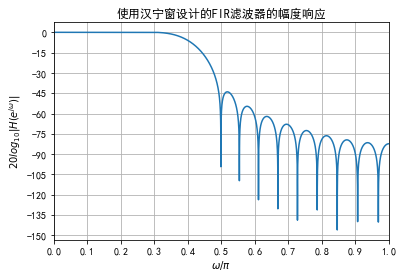

In [5]:
#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(f,Ar[:N1]);ax.grid()
ax.set_title('使用汉宁窗设计的FIR滤波器的幅度响应');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);
#ax.set_f([-100,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./fir_window1.png',dpi=500)

- 案例二：用窗函数法设计一个$h(n)$偶对称的线性相位FIR高通滤波器，给定通带截止频率$w_p=0.4\pi$，阻带截止频率为$w_st=0.2\pi$，阻带衰减为$A_s=50dB$。

In [6]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [7]:
#滤波器参数
wp = 0.4*pi;ws = 0.2*pi; #通带和阻带截止频率
wc = (wp+ws)/2;Bt = np.abs(wp-ws) #截止频率和过渡带宽

#由阻带衰减As = 40，可以确定窗形状为海明窗
N = np.ceil((6.6*pi)/Bt)+1;N = int(N+(N+1)%2)#滤波器长度点数（取奇数）
wn = signal.windows.hamming(N) #汉宁窗的wn值

In [9]:
#理想高通滤波器的单位取样响应
def high_pass(N):
    t = int((N-1)/2)
    n1 = np.arange(N);n1 = np.delete(n1,t)
    hd = -np.sin(wc*(n1-t))/(pi*(n1-t))
    hd = np.insert(hd,t,(1-wc/pi))
    return hd

In [10]:
#线性相位FIR滤波器
hd = high_pass(N)
h = hd*wn;N0 = N*1000
He = np.abs(fft.fft(h,N0));He = He/np.max(He)
Ar = 20*np.log10(He);N1 = int(N0/2)
f = np.linspace(0,1,N1)

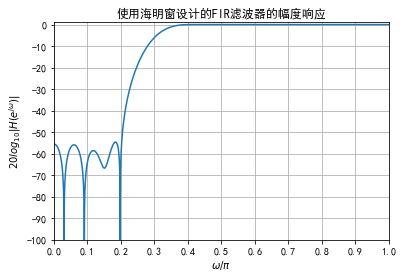

In [11]:
#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(f,Ar[:N1]);ax.grid()
ax.set_title('使用海明窗设计的FIR滤波器的幅度响应');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);ax.set_ylim([-100,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./fir_window2.png',dpi=500)

- 案例三：用窗函数法设计一个$h(n)$偶对称的线性相位FIR带通滤波器，给定下阻带截止频率$f_{st_1}=2kHz$，上阻带截止频率$f_{st_2}=6kHz$，通带下截止频率为$f_{p_1}=3kHz$，通带上截止频率为$f_{p_2}=5kHz$，阻带最小衰减为$A_s=55dB$，抽样频率为$f_s=20kHz$。

In [12]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [13]:
#滤波器参数
fs = 20000; #抽样频率
wp1 = 2*pi*3000/fs;wp2 = 2*pi*5000/fs #通带截止频率
ws1 = 2*pi*2000/fs;ws2 = 2*pi*6000/fs #阻带截止频率
w1 = (wp1+ws1)/2;w2 = (wp2+ws2)/2 
Bt = np.array([np.abs(wp1-ws1),np.abs(wp2-ws2)]);Bt = Bt.min() #过渡带宽

#由阻带衰减As = 55，可以确定窗形状为布拉克曼窗
N = np.ceil((11*pi)/Bt)+1;N = int(N+(N+1)%2)#滤波器长度点数（取奇数）
wn = signal.windows.blackman(N) #汉宁窗的wn值

In [16]:
#理想带通滤波器的单位取样响应
def band_pass(N):
    t = int((N-1)/2)
    n1 = np.arange(N);n1 = np.delete(n1,t)
    hd = (np.sin(w2*(n1-t))-np.sin(w1*(n1-t)))/(pi*(n1-t))
    hd = np.insert(hd,t,(w2-w1)/pi)
    return hd

In [17]:
#线性相位FIR滤波器
hd = band_pass(N)
h = hd*wn;N0 = N*1000
He = np.abs(fft.fft(h,N0));He = He/np.max(He)
Ar = 20*np.log10(He);N1 = int(N0/2);f = np.linspace(0,1,N1)

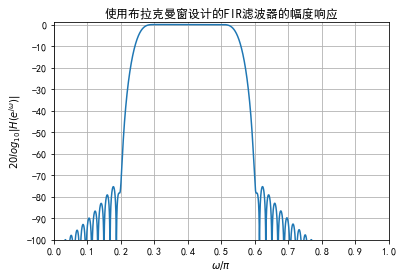

In [18]:
#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(f,Ar[:N1]);ax.grid()
ax.set_title('使用布拉克曼窗设计的FIR滤波器的幅度响应');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);ax.set_ylim([-100,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./fir_window3.png',dpi=500)

- 案例四：用窗函数法设计一个$h(n)$偶对称的线性相位FIR带阻滤波器，给定阻带下截止频率$f_{st_1}=40Hz$，阻带上截止频率$f_{st_2}=60Hz$，下通带截止频率为$f_{p_1}=15Hz$，上通带截止频率为$f_{p_2}=80Hz$，阻带最小衰减为$A_s=50dB$，抽样频率为$f_s=250Hz$。

In [19]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [20]:
#滤波器参数
fs = 250; #抽样频率
wp1 = 2*pi*15/fs;wp2 = 2*pi*80/fs #通带截止频率
ws1 = 2*pi*40/fs;ws2 = 2*pi*60/fs #阻带截止频率
w1 = (wp1+ws1)/2;w2 = (wp2+ws2)/2 
Bt = np.array([np.abs(wp1-ws1),np.abs(wp2-ws2)]);Bt = Bt.min() #过渡带宽

#由阻带衰减As = 50，可以确定窗形状为海明窗
N = np.ceil((6.6*pi)/Bt)+1;N = int(N+(N+1)%2)#滤波器长度点数（取奇数）
wn = signal.windows.hamming(N) #汉宁窗的wn值

In [21]:
#理想带阻滤波器的单位取样响应
def band_stop(N):
    t = int((N-1)/2)
    n1 = np.arange(N);n1 = np.delete(n1,t)
    hd = (np.sin(pi*(n1-t))-np.sin(w2*(n1-t))+np.sin(w1*(n1-t)))/(pi*(n1-t))
    hd = np.insert(hd,t,(1-((w2-w1)/pi)))
    return hd

In [22]:
#线性相位FIR滤波器
hd = band_stop(N)
h = hd*wn;N0 = N*1000
He = np.abs(fft.fft(h,N0));He = He/np.max(He)
Ar = 20*np.log10(He);N1 = int(N0/2);f = np.linspace(0,1,N1)

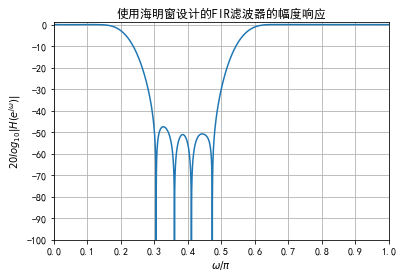

In [23]:
#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(f,Ar[:N1]);ax.grid()
ax.set_title('使用海明窗设计的FIR滤波器的幅度响应');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);ax.set_ylim([-100,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./fir_window4.png',dpi=500)